## Import libraries and the dataset

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\JITHAN\\Downloads\\day.csv")

## Understand the data

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualize the data

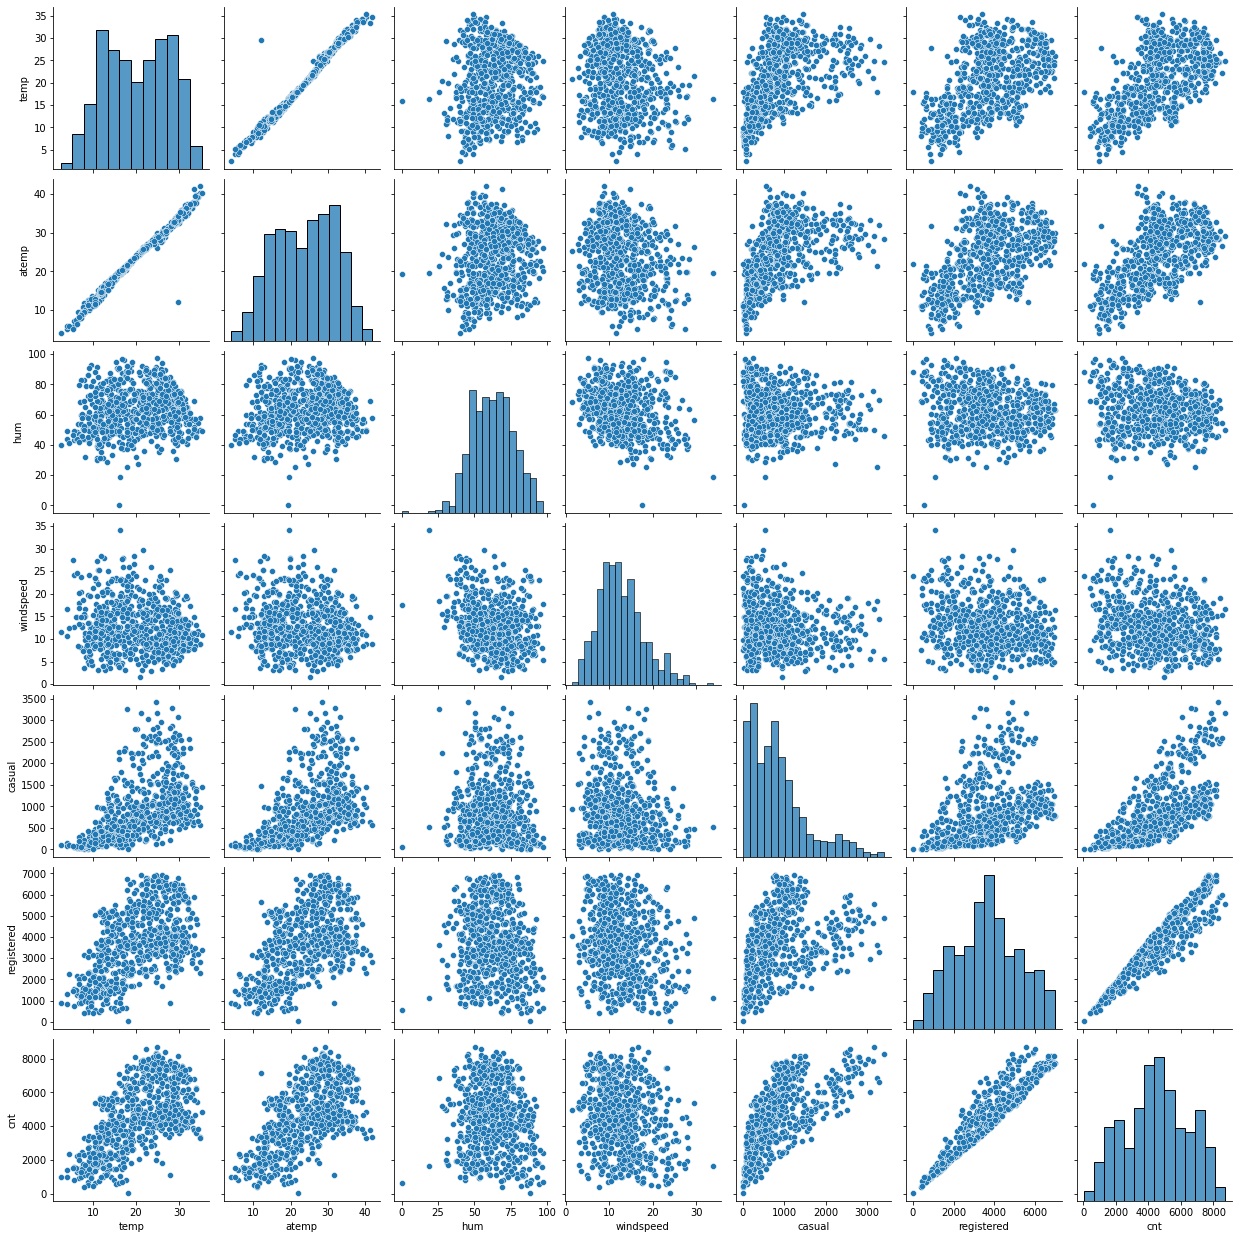

In [9]:
# Visualization of numerical variables, though others show up as numerical, they are infact categorical
sns.pairplot(df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

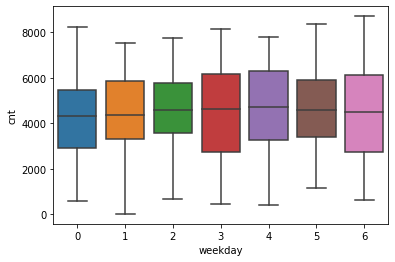

In [10]:
# visualization of the categorical variables
sns.boxplot(x="weekday", y="cnt", data=df)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

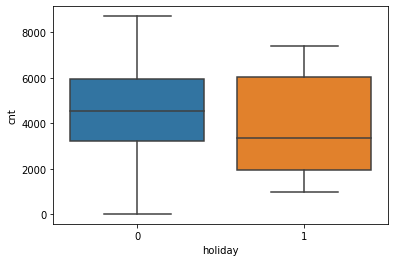

In [11]:
sns.boxplot(x="holiday", y="cnt", data=df)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

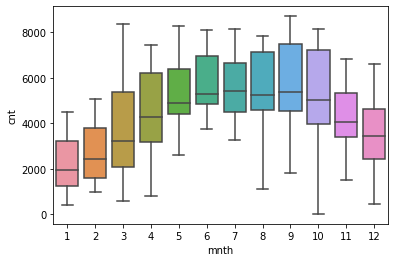

In [12]:
sns.boxplot(x="mnth", y="cnt", data=df)

<AxesSubplot:xlabel='season', ylabel='cnt'>

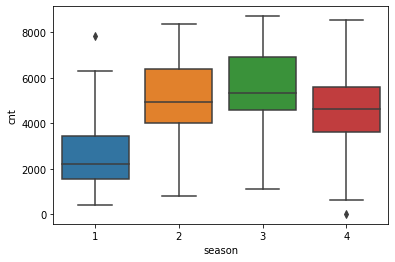

In [13]:
sns.boxplot(x="season", y="cnt", data=df)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

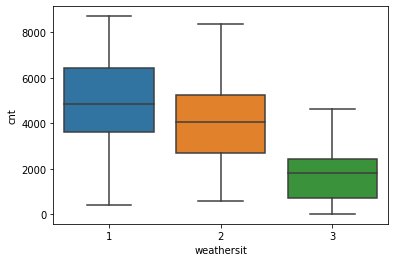

In [14]:
sns.boxplot(x="weathersit", y="cnt", data=df)

## Preparing the data

### 1) Let us replace the numbers in categorical variables with proper values as mentioned from data characteristics
### 2) We will convert these categorical variables to values between 0 or 1 with use of dummy variables to account for all possible cases

In [15]:
def day_map(x):
    if x==0: return "Sunday"
    if x==1: return "Monday"
    if x==2: return "Tuesday"
    if x==3: return "Wednesday"
    if x==4: return "Thursday"
    if x==5: return "Friday"
    if x==6: return "Saturday"
df["weekday"] = df["weekday"].apply(day_map)

In [16]:
def month_map(x):
    if x==1: return "Jan"
    if x==2: return "Feb"
    if x==3: return "Mar"
    if x==4: return "Apr"
    if x==5: return "May"
    if x==6: return "Jun"
    if x==7: return "Jul"
    if x==8: return "Aug"
    if x==9: return "Sep"
    if x==10: return "Oct"
    if x==11: return "Nov"
    if x==12: return "Dec"
df.mnth = df.mnth.apply(month_map)

In [17]:
def weather_map(x):
    if x==1: return "Clear"
    if x==2: return "Misty"
    if x==3: return "LightRain"
    if x==4: return "HeavyRain"

df.weathersit = df.weathersit.apply(weather_map)

In [18]:
def season_map(x):
    if x==1: return "spring"
    if x==2: return "summer"
    if x==3: return "fall"
    if x==4: return "winter"

df.season = df.season.apply(season_map)

In [19]:
# Check the changes
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# Convert categorical variables using dummy variables
dummy = pd.get_dummies(df[[ 'season', 'weathersit', "mnth", "weekday"]], drop_first=True)
df = pd.concat([df, dummy], axis=1)

In [21]:
# Check the changes
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightRain', 'weathersit_Misty', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [23]:
# Lets remove the variables which are not useful for us
# 1 - instant - just an index variable, not useful for our model
# 2 - dteday - date variable which is not useful for our model
# 3 - converted categorical vars - season, weathersit, mnth, weekday
# 4 - registered & casual - cnt is the addition of these 2 vars, so these 2 needs to be removed
df.drop(["instant", "dteday", 'season', 'weathersit', "mnth", "weekday", "casual", "registered"], axis=1, inplace=True)

In [24]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain', 'weathersit_Misty', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [25]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### Split the data into training and test
### We will use 80:20 split as data rows is below 1000 entries

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

### Scaling data - we will scale twice once on training set and second on test set, 
### so that each are not aware of the outlying values so as not bias the model

In [28]:
# scaling
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])

### Model Building

In [29]:
# Divide into X & y for model building
y_train = df_train.pop("cnt")
X_train = df_train

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
rfe = RFE(lm)

In [33]:
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('weathersit_LightRain', True, 1),
 ('weathersit_Misty', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', False, 3),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 15)]

In [34]:
# We will consider only significant rows given by rfe with value True for rfe.support_
true_cols = X_train.columns[rfe.support_]

In [35]:
X_train_rfe = X_train[true_cols]

In [36]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.59e-224
Time:                        17:22:36   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3110 

In [37]:
# From summary of model we see, all selected vars are significant
# Lets check VIF as well if there are any correlated variables still left
from statsmodels.stats.outliers_influence import variance_inflation_factor

def print_vif(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(vif)
    
print_vif(X_train_rfe)

                Features    VIF
0                  const  71.40
3                   temp   3.55
6          season_spring   2.84
7          season_winter   2.19
4                    hum   1.94
9       weathersit_Misty   1.61
11              mnth_Jan   1.60
13              mnth_Nov   1.60
2             workingday   1.58
14      weekday_Saturday   1.57
10              mnth_Dec   1.41
12              mnth_Jul   1.28
8   weathersit_LightRain   1.25
5              windspeed   1.19
1                     yr   1.03


### Residual Analysis

In [38]:
y_train_pred = lm.predict(X_train_rfe)

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

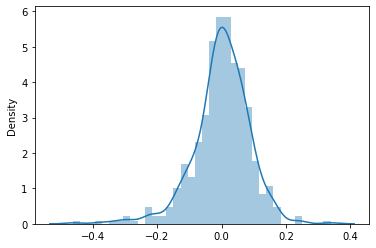

In [39]:
res = y_train - y_train_pred
sns.distplot(res)

### We can see the assumption of linear model that residuals follow normal distribution is valid

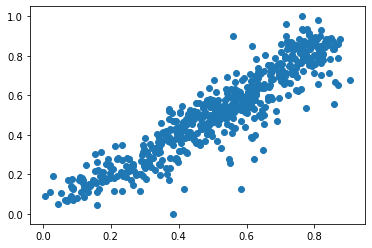

In [40]:
plt.scatter(y_train_pred, y_train)

### We can see here from scatter plot that there is a constant variance (homoscedasticity)

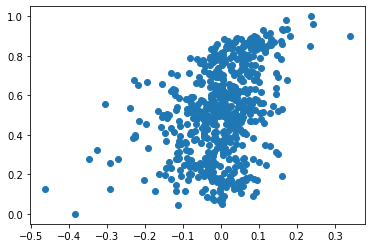

In [42]:
plt.scatter(res, y_train)

### From this scatter plot we can see that the error terms are independent of each other


## Predictions and Evaluation on the test set

In [43]:
# Scale the test data, for no bias we use transform instead of fit_transform
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_test[num_vars] = Scaler.transform(df_test[num_vars])

In [44]:
# split the data into X & y
y_test = df_test.pop("cnt")
X_test = df_test

In [45]:
# Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [46]:
# Lets select columns same as our training data
X_test_rfe = X_test_sm[X_train_rfe.columns]

### Prediction

In [47]:
y_test_pred = lm.predict(X_test_rfe)

### Get the score using R-squared to check the model efficiency

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.7840827509029042
